In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()

student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

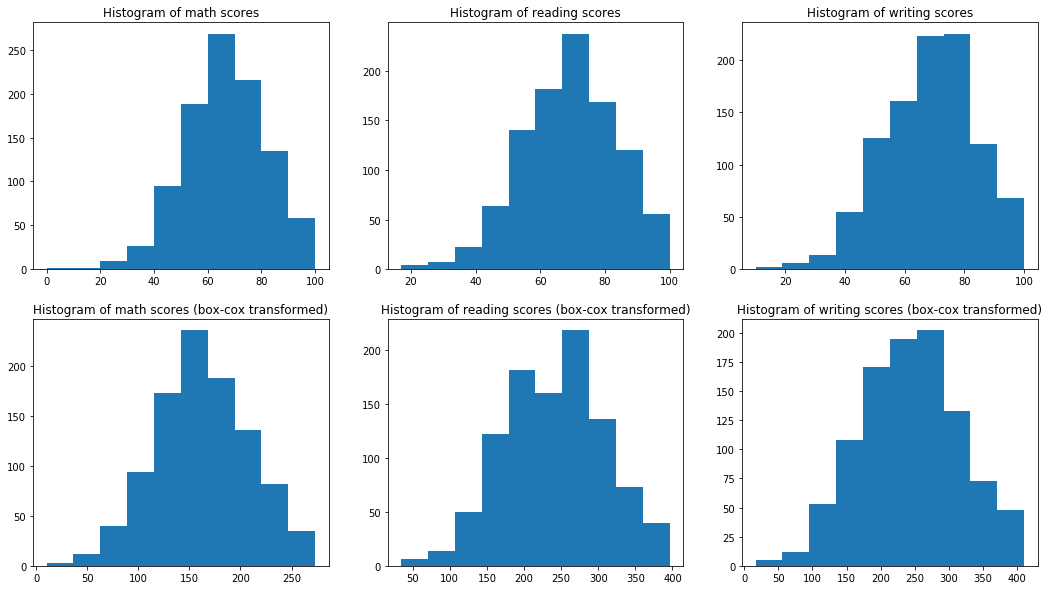

In [3]:
#Plotting exam scores with histograms to see if normally distributed

#boxcox can only tranforms values > 0; since math score has a value of 0, going to exclude that datapoint
math_boxcox,_ = boxcox(student_df[student_df['math score'] >0]['math score'])
reading_boxcox,_ = boxcox(student_df['reading score'])
writing_boxcox,_ = boxcox(student_df['writing score'])

plt.figure(figsize=(18,10))

plt.subplot(2,3,1)
plt.hist(student_df['math score'])
plt.title('Histogram of math scores')

plt.subplot(2,3,2)
plt.hist(student_df['reading score'])
plt.title('Histogram of reading scores')

plt.subplot(2,3,3)
plt.hist(student_df['writing score'])
plt.title('Histogram of writing scores')

plt.subplot(2, 3, 4)
plt.hist(math_boxcox)
plt.title('Histogram of math scores (box-cox transformed)')

plt.subplot(2, 3, 5)
plt.hist(reading_boxcox)
plt.title('Histogram of reading scores (box-cox transformed)')

plt.subplot(2, 3, 6)
plt.hist(writing_boxcox)
plt.title('Histogram of writing scores (box-cox transformed)')

plt.show()

All of the box-cox transformed histograms resemble a more normal distribution than the raw histograms.

To statistically test this, I am going to apply the Jargue-Bera and Normal tests on the raw and boxcox transformed data.   

In [4]:
#Jargue-Bera and Normal tests on raw data
jb_stats = jarque_bera(student_df['math score'])
norm_stats = normaltest(student_df['math score'])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(student_df['reading score'])
norm_stats = normaltest(student_df['reading score'])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(student_df['writing score'])
norm_stats = normaltest(student_df['writing score'])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974


The normality tests indicate that none of the exam scores are normally distributed.  

In [5]:
#Jargue-Bera and Normal tests on boxcox transformed data
jb_stats = jarque_bera(math_boxcox)
norm_stats = normaltest(math_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_boxcox)
norm_stats = normaltest(reading_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_boxcox)
norm_stats = normaltest(writing_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1.720098104874378 and p value is 0.4231413256953709
Normality test statistics is 1.8323073377495822 and p value is 0.40005482895717037
Jarque-Bera test statistics is 4.119778575331906 and p value is 0.1274680814024559
Normality test statistics is 5.282274611852865 and p value is 0.07128015609575467
Jarque-Bera test statistics is 4.746478090040098 and p value is 0.09317842784055597
Normality test statistics is 6.267311355043339 and p value is 0.04355827085023795


After applying the Box-Cox Transformation, the normality tests indicates that the transformed variables are all normally distributed.

### 2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

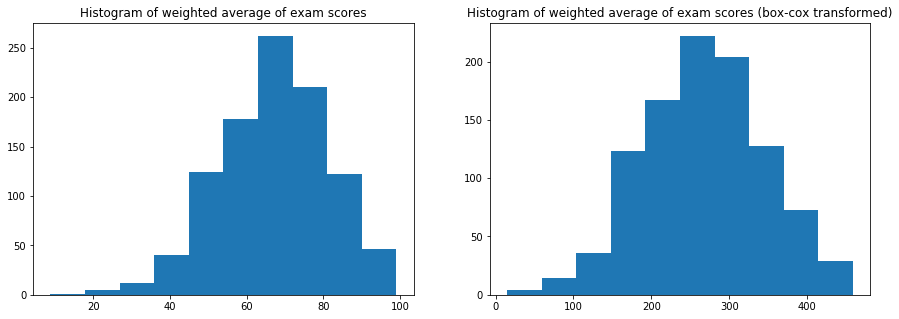

In [6]:
#Histogram of weighted average of exam scores
weighted_avg = student_df['math score']*(.33) + student_df['reading score']*(.33) + student_df ['writing score']*(.33)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(weighted_avg)
plt.title('Histogram of weighted average of exam scores')

#Histogram of boxcox transformed weighted average
weighted_avg_boxcox,_ = boxcox(weighted_avg)

plt.subplot(1,2,2)
plt.hist(weighted_avg_boxcox)
plt.title('Histogram of weighted average of exam scores (box-cox transformed)')

plt.show()

The histogram of the new variable skews left.  The box-cox transformed histogram more closely resembles a normal distribution than the raw histogram.  

In [7]:
#Normality tests on raw data

jb_stats = jarque_bera(weighted_avg)
norm_stats = normaltest(weighted_avg)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 15.453387913085441 and p value is 0.00044089934264401887
Normality test statistics is 15.186721327231577 and p value is 0.0005037851534493836


The normality tests indicate that the new variable is not normally distributed.  

In [8]:
#Normality tests on boxcox transformed data

jb_stats = jarque_bera(weighted_avg_boxcox)
norm_stats = normaltest(weighted_avg_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 2.435398933031959 and p value is 0.2959101356540397
Normality test statistics is 2.7798576020476062 and p value is 0.24909303916968686


The normality tests conclude that after applying the Box-Cox Transformation, the data becomes normally distributed.  

### 3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

I think the variable test preparation course is probably the biggest determinant of success in exams.  However, I also think that parental level of education, gender, and lunch are variables that potentially determine success in exams.  